In [1]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [12]:
#Shape of Each Training Set
X_train[0].shape

(28, 28)

<Figure size 640x480 with 0 Axes>

<Figure size 50x30 with 0 Axes>

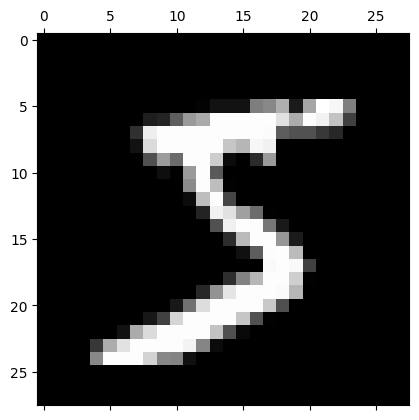

In [15]:
#Preview of each Training Set
plt.gray()
plt.figure(figsize=(0.5,0.3))
plt.matshow(X_train[0])

In [23]:
X_trainf = X_train.reshape(len(X_train),28*28)
X_testf = X_test.reshape(len(X_test),28*28)

In [26]:
y_train[0]

5

In [30]:
# Feature Scaling
xsc = MinMaxScaler()
X_trains = xsc.fit_transform(X_trainf)
X_tests = xsc.fit_transform(X_testf)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units= 10, activation= "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics= ['accuracy']

)

model.fit(X_trains,y_train,epochs= 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8132 - loss: 0.7222
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9138 - loss: 0.3092
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.9211 - loss: 0.2806
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9242 - loss: 0.2719
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9251 - loss: 0.2725
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.9281 - loss: 0.2565
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9290 - loss: 0.2561
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9293 - loss: 0.2512
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9287 - loss: 0.2532
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9303 - loss: 0.2455
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.9306 - loss: 0.2478
Epoch 12/20
1875/1

In [47]:
# prediction added
prediction = model.predict(X_tests)
print(y_predicted[15])
print(f"Number: {np.argmax(y_predicted[15])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
[9.91359074e-03 1.71506603e-04 4.46683588e-03 7.67585039e-01
 2.86033435e-04 9.81266141e-01 1.57855963e-03 1.14265655e-08
 8.04984987e-01 2.69655993e-05]
Number: 5


In [56]:
# List comprehension having predicted numbers
y_predicted = [np.argmax(i) for i in prediction]
cm  = tf.math.confusion_matrix(y_test,y_predicted)

Text(0.5, 1.0, 'Confusion Matrix')

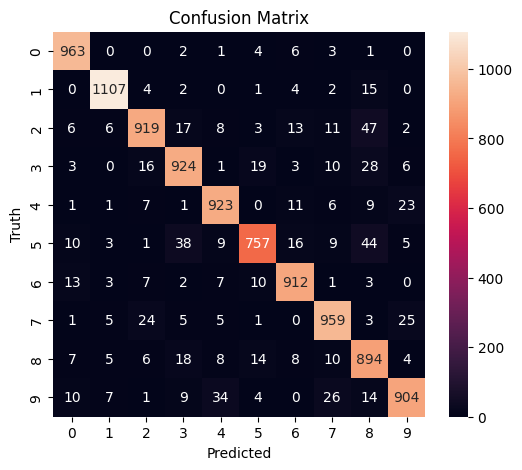

In [67]:
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")